In [1]:
import os
import pandas as pd

In [2]:
!ls "../chicago/ridership"

daily  monthly


In [3]:
ridership_folder = "../chicago/ridership/daily"
ridership_files = os.listdir(ridership_folder)
ridership_files

['cta-ridership-bus-routes-daily-totals-by-route.csv',
 'cta-ridership-daily-boarding-totals.csv',
 'cta-ridership-l-station-entries-daily-totals.csv']

### There are 3 files containing "daily" information,can we combine these 3 files?

In [4]:
bus_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[0]))
bus_daily_total.head()

/tmp/ipykernel_11993/1714229132.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[0]))


,route,date,daytype,rides
0,1,2019-06-28T00:00:00.000,W,1476
1,1,2019-06-27T00:00:00.000,W,2007
2,1,2019-06-26T00:00:00.000,W,1748
3,1,2019-06-25T00:00:00.000,W,1927
4,1,2019-06-24T00:00:00.000,W,1727


In [5]:
bus_daily_total = bus_daily_total.sort_values(by=['date']).reset_index(drop=True)
print(bus_daily_total.iloc[0,1],bus_daily_total.iloc[-1,1])

2001-01-01T00:00:00.000 2019-06-30T00:00:00.000


In [6]:
bus_daily_total.head()

,route,date,daytype,rides
0,43,2001-01-01T00:00:00.000,U,311
1,36,2001-01-01T00:00:00.000,U,7044
2,145,2001-01-01T00:00:00.000,U,1379
3,81W,2001-01-01T00:00:00.000,U,200
4,30,2001-01-01T00:00:00.000,U,600


看起來這個資料是每天的各個公車路線有多少人流 (This table shows how many rider per route per day)

In [7]:
daily_boarding = pd.read_csv(os.path.join(ridership_folder, ridership_files[1]))
daily_boarding.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01T00:00:00.000,U,297192,126455,423647
1,2001-01-02T00:00:00.000,W,780827,501952,1282779
2,2001-01-03T00:00:00.000,W,824923,536432,1361355
3,2001-01-04T00:00:00.000,W,870021,550011,1420032
4,2001-01-05T00:00:00.000,W,890426,557917,1448343


這個資料看起來是每天有多少人搭巴士、多少人搭火車、兩個加起來總共有多少人流（This table shows 3 types of rides per day, which are how many people take buses, how many people take trains, and total number of people.）

In [8]:
station_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[2]))
station_daily_total.head()

,station_id,stationname,date,daytype,rides
0,40350,UIC-Halsted,2001-01-01T00:00:00.000,U,273
1,41130,Halsted-Orange,2001-01-01T00:00:00.000,U,306
2,40760,Granville,2001-01-01T00:00:00.000,U,1059
3,40070,Jackson/Dearborn,2001-01-01T00:00:00.000,U,649
4,40090,Damen-Brown,2001-01-01T00:00:00.000,U,411


這個看起來是每個火車站每天的人流(This table shows how many rides per station per day)

#### We combine `bus_daily_total` and `station_daily_total`

In [9]:
bus_daily_total.shape, station_daily_total.shape

((824291, 4), (962546, 5))

It seems the combined data is very large, my laptop is unable to process it. So let's use 'half' of each frame. The definition of half is by the date.

In [10]:
for_time_process = bus_daily_total.copy()
for_time_process['timestamp'] = pd.to_datetime(for_time_process['date'])
for_time_process['year'] = for_time_process.timestamp.dt.year
for_time_process['month'] =  for_time_process.timestamp.dt.month
for_time_process.head()

,route,date,daytype,rides,timestamp,year,month
0,43,2001-01-01T00:00:00.000,U,311,2001-01-01,2001,1
1,36,2001-01-01T00:00:00.000,U,7044,2001-01-01,2001,1
2,145,2001-01-01T00:00:00.000,U,1379,2001-01-01,2001,1
3,81W,2001-01-01T00:00:00.000,U,200,2001-01-01,2001,1
4,30,2001-01-01T00:00:00.000,U,600,2001-01-01,2001,1


In [11]:
print(for_time_process.year.value_counts().reset_index().sort_values(by=['year']))

    year  count
13  2001  42434
10  2002  43184
9   2003  44157
5   2004  45657
4   2005  46276
3   2006  47070
0   2007  48826
1   2008  48521
2   2009  48109
6   2010  45201
7   2011  44782
8   2012  44730
11  2013  43002
16  2014  42198
14  2015  42370
12  2016  42549
15  2017  42294
17  2018  42110
18  2019  20821


#### Let's select data from 2015 to 2019

In [12]:
type(for_time_process.loc[0,'date'])

str

In [13]:
bus_daily_total['date'] = pd.to_datetime(bus_daily_total['date'])
station_daily_total['date'] = pd.to_datetime(station_daily_total['date'])

start_date, end_date = pd.to_datetime('2015-01-01'), pd.to_datetime('2019-12-31')

bus_daily_total = bus_daily_total[(bus_daily_total['date'] >= start_date) & (bus_daily_total['date'] <= end_date)].reset_index(drop=True)
station_daily_total = station_daily_total[(station_daily_total['date'] >= start_date) & (station_daily_total['date'] <= end_date)].reset_index(drop=True)

Meaning of `route` of `bus_daily_total` is the same as meaning of `station_id` of `station_daily_total`, so we'll rename the column first and then concat 2 dataframes vertically.

In [14]:
# check id overlapping
bus_ids = bus_daily_total.route.unique()
station_ids = station_daily_total.station_id.unique()
list(set(bus_ids) & set(station_ids))

[]

In [15]:
bus_daily = bus_daily_total.copy()
station_daily = station_daily_total.copy()

bus_daily = bus_daily.rename(columns={'route':'id'})
station_daily = station_daily.rename(columns={'station_id':'id'})

# add a tag, `transportation`
bus_daily['transportation'] = ['bus']*len(bus_daily)
station_daily['transportation'] = ['train']*len(station_daily)

station_daily = station_daily.drop(columns=['stationname'])

In [16]:
bus_daily.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


In [17]:
station_daily.head()

,id,date,daytype,rides,transportation
0,40570,2015-01-01,U,2344,train
1,41330,2015-01-01,U,763,train
2,40310,2015-01-01,U,1029,train
3,41010,2015-01-01,U,528,train
4,41290,2015-01-01,U,1526,train


In [18]:
bus_station_daily_total = pd.concat([bus_daily, station_daily], axis=0)
bus_station_daily_total.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


### Visually inspect the combined data

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#### How does the number of rides vary by day type (e.g., weekday, weekend, holiday) across different transportation modes (bus vs. train)?

<Figure size 1000x600 with 0 Axes>

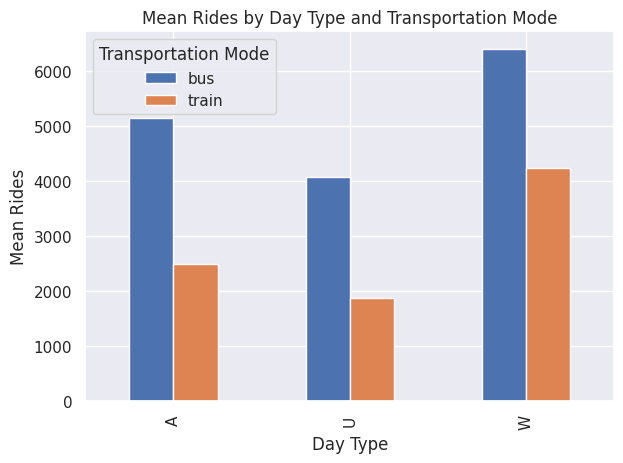

In [20]:
# Group by day type and transportation mode, then calculate the mean rides
grouped_df = bus_station_daily_total.groupby(['daytype', 'transportation'])['rides'].mean().reset_index()

# Pivot the DataFrame for easier plotting
pivoted_df = grouped_df.pivot(index='daytype', columns='transportation', values='rides')

# Plotting
plt.figure(figsize=(10, 6))
sns.set()
pivoted_df.plot(kind='bar')
plt.title('Mean Rides by Day Type and Transportation Mode')
plt.xlabel('Day Type')
plt.ylabel('Mean Rides')
plt.legend(title='Transportation Mode')
plt.tight_layout()
plt.show()


1. rides of bus > rides of train
2. rides of weekday > rides of saturday > rides of holiday

#### Are there any seasonal trends in the number of rides for both buses and trains?

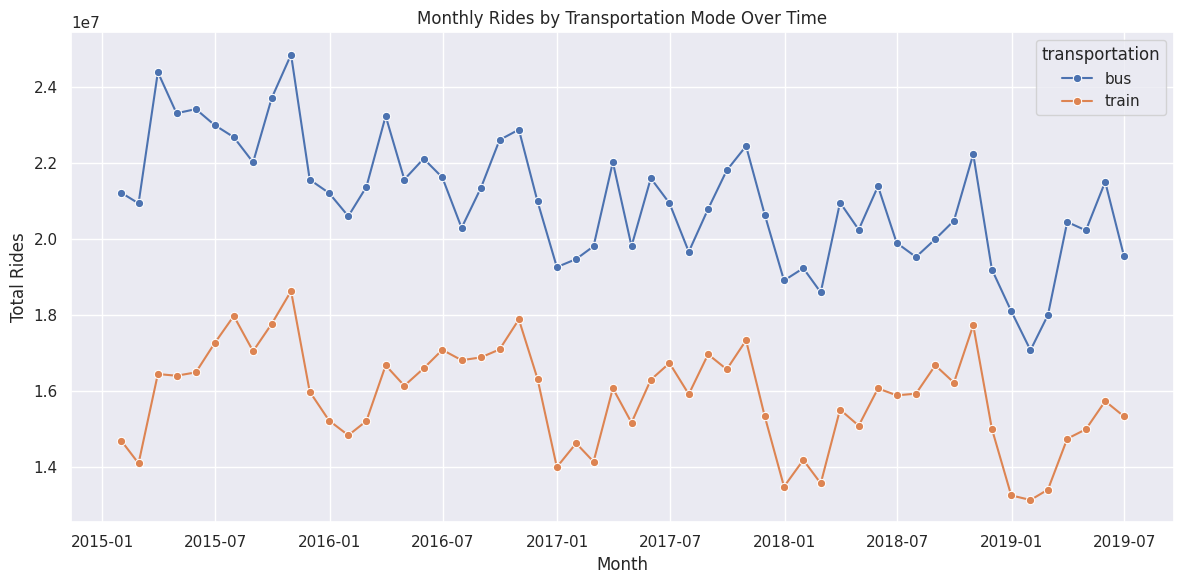

In [21]:
# Group by date and transportation mode, then calculate the sum of rides
grouped_df = bus_station_daily_total.groupby([pd.Grouper(key='date', freq='ME'), 'transportation'])['rides'].sum().reset_index()

# Pivot the DataFrame for easier plotting
# pivoted_df = grouped_df.pivot(index='date', columns='transportation', values='rides')

# Plotting
plt.figure(figsize=(12, 6))
sns.set()
# pivoted_df.plot(kind='line', marker='o')
sns.lineplot(data=grouped_df, x="date", y="rides", marker="o",hue='transportation')
plt.title('Monthly Rides by Transportation Mode Over Time')
plt.xlabel('Month')
plt.ylabel('Total Rides')
# plt.legend(title='Transportation Mode')
plt.tight_layout()
plt.show()


1. Trend
    * overall: rides decresing over time
    * bus: peak happening month is almost the same with train; rides are low on summer and winter
    * train: rides rises from Feb to Oct and then drop rapidly

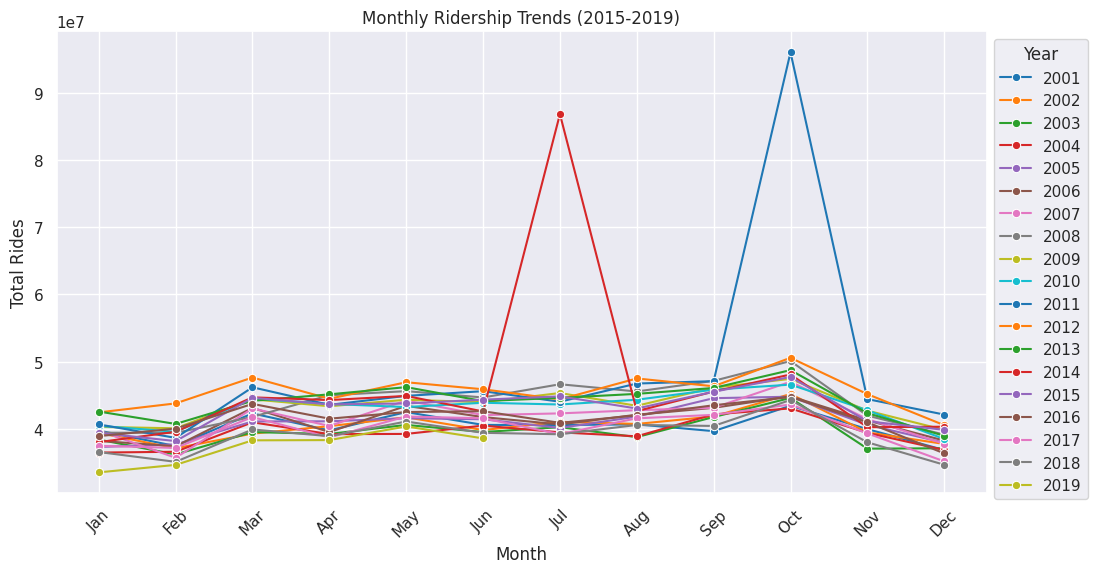

In [22]:
# varify the above description
daily_boarding["date"] = pd.to_datetime(daily_boarding["service_date"]) 
daily_boarding["year"] = daily_boarding["date"].dt.year
daily_boarding["month"] = daily_boarding["date"].dt.month

monthly_ridership = daily_boarding.groupby(["year", "month"])["total_rides"].sum().reset_index()
monthly_ridership["month"] = monthly_ridership["month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ridership, x="month", y="total_rides", hue="year", marker="o", palette="tab10")
plt.title("Monthly Ridership Trends (2015-2019)")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Which bus and train stations have the highest and lowest ridership numbers over the years?

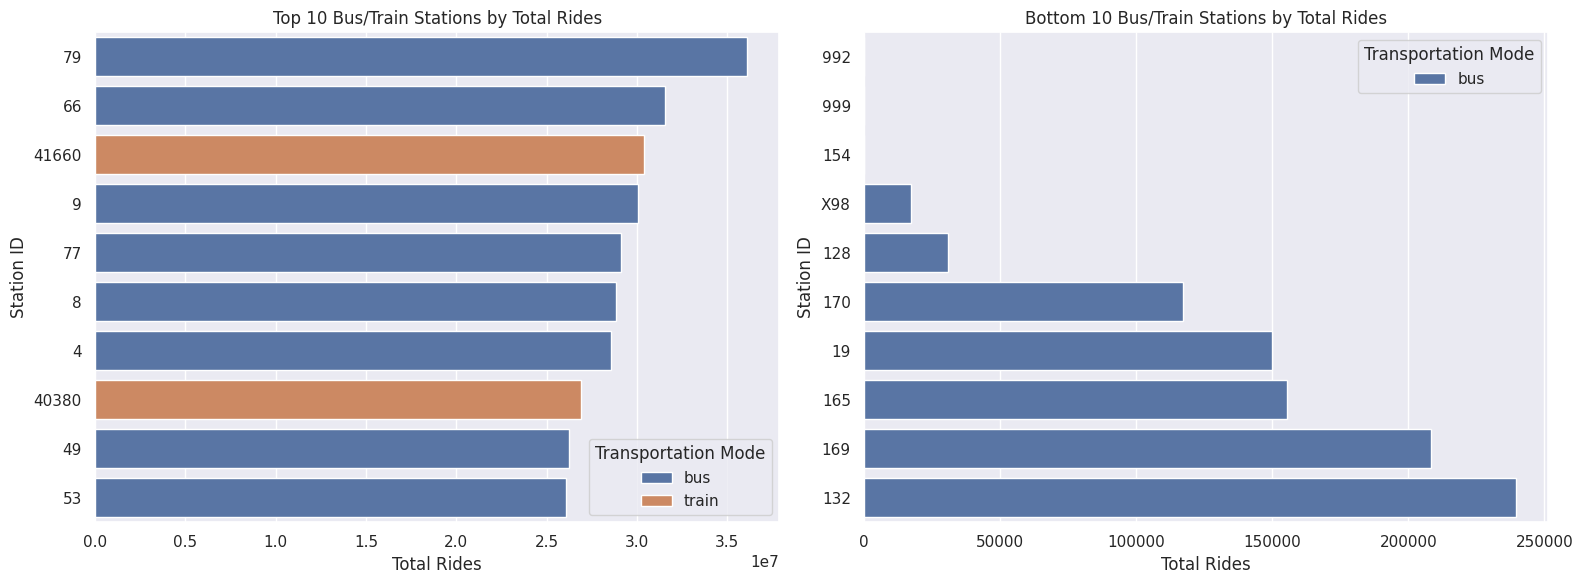

In [23]:
# Group by station id and transportation mode, then calculate the total rides
total_rides = bus_station_daily_total.groupby(['id', 'transportation'])['rides'].sum().reset_index()

# Find the top and bottom stations for each transportation mode
top_stations = total_rides.nlargest(10, 'rides')
bottom_stations = total_rides.nsmallest(10, 'rides')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.set()
sns.barplot(x='rides', y='id', hue='transportation', data=top_stations, ax=axs[0])
axs[0].set_title('Top 10 Bus/Train Stations by Total Rides')
axs[0].set_xlabel('Total Rides')
axs[0].set_ylabel('Station ID')
axs[0].legend(title='Transportation Mode')

sns.barplot(x='rides', y='id', hue='transportation', data=bottom_stations, ax=axs[1])
axs[1].set_title('Bottom 10 Bus/Train Stations by Total Rides')
axs[1].set_xlabel('Total Rides')
axs[1].set_ylabel('Station ID')
axs[1].legend(title='Transportation Mode')

plt.tight_layout()
plt.show()

We need geo data to make visualization more information

#### Can you identify any bus or train stations that show significant changes in ridership over the years?

/tmp/ipykernel_11993/1556395844.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


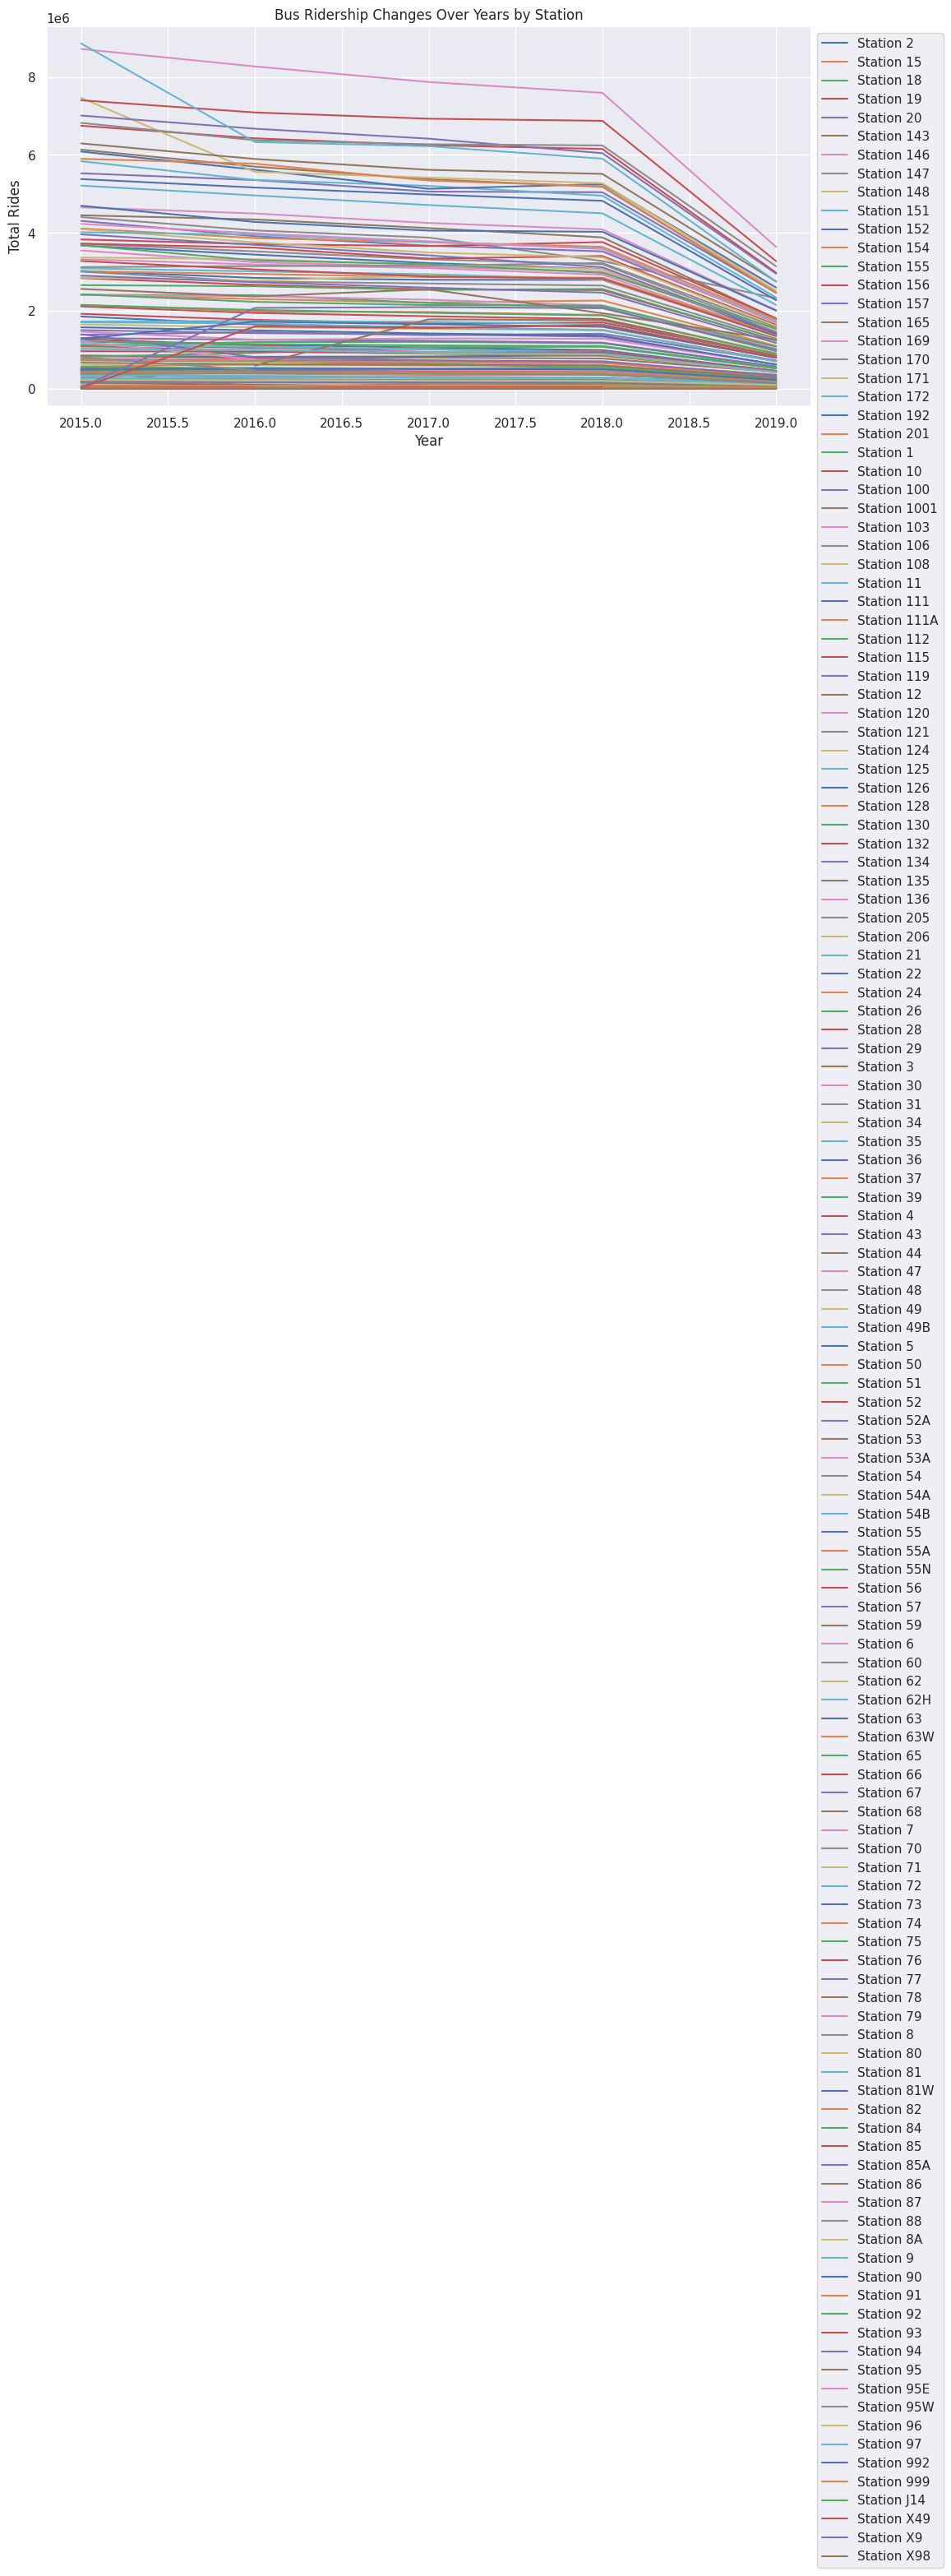

In [24]:
# Extract year from date
bus_bus_station_daily_total = bus_station_daily_total.copy()
bus_bus_station_daily_total = bus_bus_station_daily_total[bus_bus_station_daily_total.transportation=='bus'].reset_index(drop=True)
bus_bus_station_daily_total['year'] = bus_bus_station_daily_total['date'].dt.year

# Group by station id, transportation mode, and year, then calculate the total rides
yearly_rides = bus_bus_station_daily_total.groupby(['id', 'year'])['rides'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.set()
for id in yearly_rides['id'].unique():
    station_data = yearly_rides[yearly_rides['id'] == id]
    plt.plot(station_data['year'], station_data['rides'], label=f"Station {id}")
plt.title('Bus Ridership Changes Over Years by Station')
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


/tmp/ipykernel_11993/3003829066.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


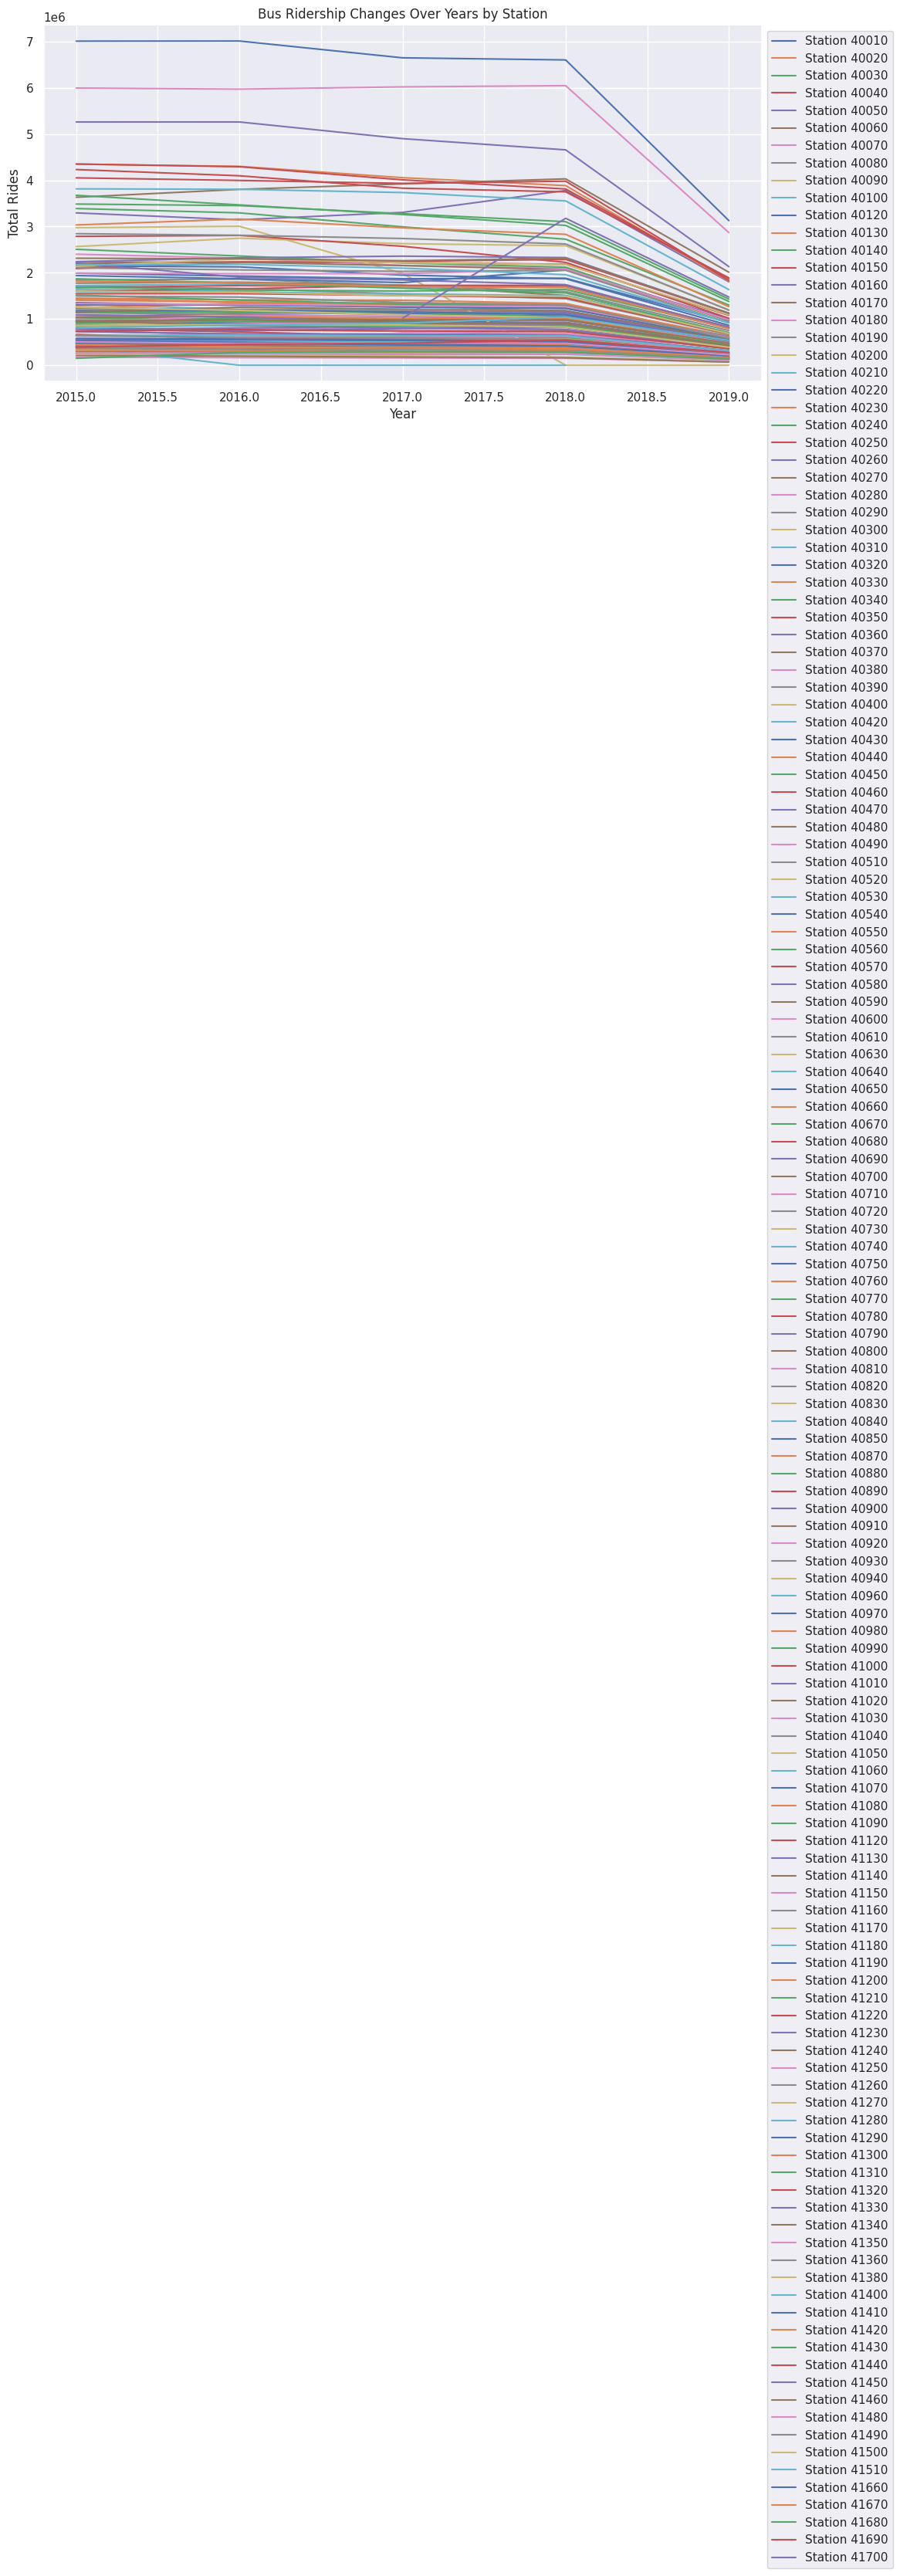

In [25]:
# Extract year from date
train_bus_station_daily_total = bus_station_daily_total.copy()
train_bus_station_daily_total = train_bus_station_daily_total[train_bus_station_daily_total.transportation=='train'].reset_index(drop=True)
train_bus_station_daily_total['year'] = train_bus_station_daily_total['date'].dt.year

# Group by station id, transportation mode, and year, then calculate the total rides
yearly_rides = train_bus_station_daily_total.groupby(['id', 'year'])['rides'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.set()
for id in yearly_rides['id'].unique():
    station_data = yearly_rides[yearly_rides['id'] == id]
    plt.plot(station_data['year'], station_data['rides'], label=f"Station {id}")
plt.title('Bus Ridership Changes Over Years by Station')
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Highlighting Stations with Significant Changes  
calculate the percentage change in ridership over the years for each station and then plot the top stations

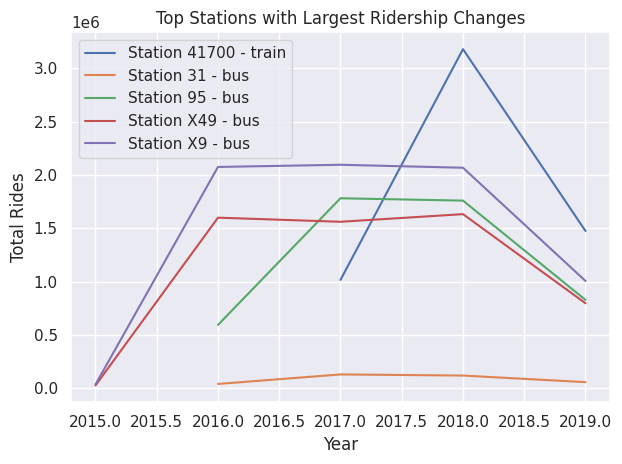

In [26]:
# Extract year from date
bus_station_daily_total['year'] = bus_station_daily_total['date'].dt.year

# Group by station id, transportation mode, and year, then calculate the total rides
yearly_rides = bus_station_daily_total.groupby(['id', 'transportation', 'year'])['rides'].sum().reset_index()

# Calculate percentage change in ridership for each station
yearly_rides_pivot = yearly_rides.pivot(index=['id', 'transportation'], columns='year', values='rides')
yearly_rides_pivot.fillna(0, inplace=True)  # Fill missing values with 0

# Calculate percentage change from the first year to the last year
first_year = yearly_rides_pivot.columns.min()
last_year = yearly_rides_pivot.columns.max()

percentage_change = ((yearly_rides_pivot[last_year] - yearly_rides_pivot[first_year]) / yearly_rides_pivot[first_year]) * 100

# Identify top stations with the largest percentage changes
top_stations = percentage_change.nlargest(5)

# Plot these top stations
for index in top_stations.index:
    station_data = yearly_rides[(yearly_rides['id'] == index[0]) & (yearly_rides['transportation'] == index[1])]
    plt.plot(station_data['year'], station_data['rides'], label=f"Station {index[0]} - {index[1]}")

plt.title('Top Stations with Largest Ridership Changes')
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.legend()
plt.tight_layout()
plt.show()
